# Indian actor classificaiton model

In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from IPython.display import display

## Variables that control the model settings and image dimensions

In [102]:
# Initial model variables
verbose = True

batch_size = 32
epochs=30

img_height = 180 
img_width = 180

6750


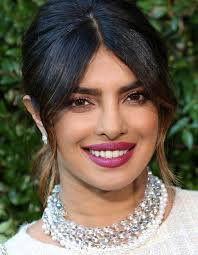

In [103]:
# Import data
dataset_dir =  pathlib.Path("dataset/Bollywood Actor Images")
label_dir = pathlib.Path("dataset/List of Actors.txt")

# Image count
if(verbose):
    image_count = len(list(dataset_dir.glob('*/*.jpg')))
    print(image_count)
    test_images = list(dataset_dir.glob('priyanka_chopra/*'))
    display(PIL.Image.open(str(test_images[4])))

## Intialising training and validtion datasets

In [104]:
train_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=7,
    image_size = (img_height,img_width),
    batch_size=batch_size
)

val_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=7,
    image_size = (img_height,img_width),
    batch_size=batch_size
)

Found 6750 files belonging to 135 classes.
Using 5400 files for training.
Found 6750 files belonging to 135 classes.
Using 1350 files for validation.


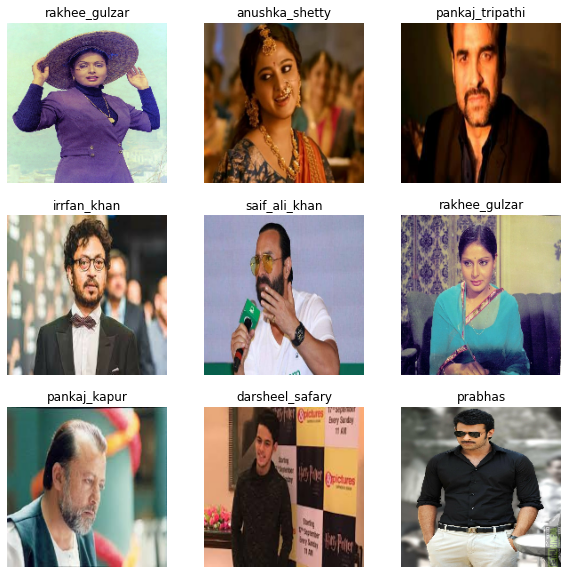

In [105]:
if(verbose):
  # Class names/labels for images
  class_names = train_ds.class_names 
  
  # First batch data
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")


In [106]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [107]:
normalization_layer = layers.Rescaling(1./255)

## Creating Convolution layers

First layer involves rescaling input data. This is better than doing it over the whole data as it involves less preparation to be put into the network.

In [108]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [109]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [111]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
169/169 [==============================] - 73s 404ms/step - loss: 4.9088 - accuracy: 0.0061 - val_loss: 4.9023 - val_accuracy: 0.0148
Epoch 2/10
 19/169 [==>...........................] - ETA: 58s - loss: 4.8741 - accuracy: 0.0230

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()